In [351]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# -------------------------------  Salary DataSet  ----------------------------

In [365]:
SalaryDS = pd.read_csv("drive/MyDrive/Colab Notebooks/Salary.csv")
SalaryDS.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


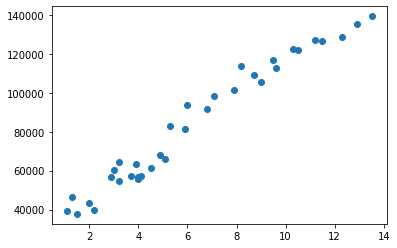

In [370]:
plt.scatter(SalaryDS['YearsExperience'], SalaryDS['Salary'])
#plt.xlabel("YearsExprience")
#plt.ylabel("Salary")


### Split Data into K-Fold

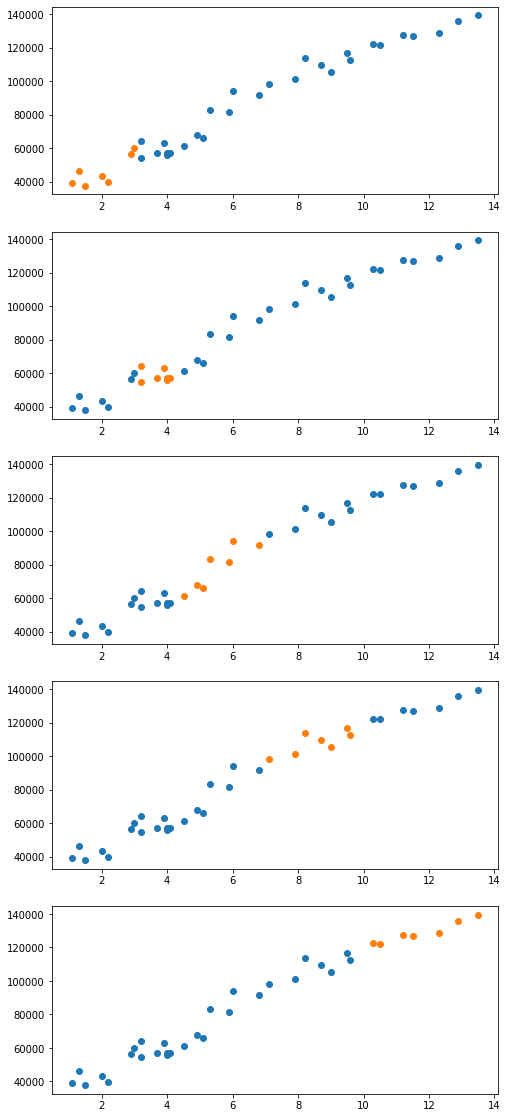

In [367]:
k=5

kf = KFold(n_splits=k, random_state=None)
LRmodel = LinearRegression()

TrainDS = [set() for z in range(k)]
TestDS = [set() for z in range(k)]

i = 0
for trainIDX, testIDX in kf.split(SalaryDS):
  TrainDS[i] = SalaryDS.iloc[trainIDX,:]
  TestDS[i]= SalaryDS.iloc[testIDX,:]
  i = i+1




fig, graph = plt.subplots(nrows = k, ncols=1)

fig.set_figwidth(8)
fig.set_figheight(20)

for i in range(k):  
  graph[i].scatter(TrainDS[i]["YearsExperience"], TrainDS[i]["Salary"])  
  graph[i].scatter(TestDS[i]["YearsExperience"], TestDS[i]["Salary"])  



### Cross Validate Score

MSE: 7503.819448195776


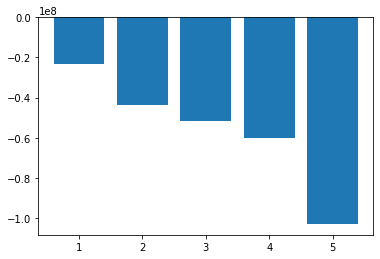

In [368]:
lrMDL = LinearRegression()
Xslr = np.reshape(SalaryDS['YearsExperience'].to_numpy(), (-1,1))
Yslr = np.reshape(SalaryDS['Salary'].to_numpy(), (-1,1))
scores = cross_val_score(lrMDL, Xslr, Yslr, scoring='neg_mean_squared_error', cv = kf)
plt.bar(('1','2', '3', '4', '5'), scores)
print("MSE:",np.sqrt(np.mean(np.absolute(scores))))

# --------------------------  Sales DataSet ------------------------------------

In [358]:
SalesDS = pd.read_csv("drive/MyDrive/Colab Notebooks/advertising.csv")
SalesDS.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


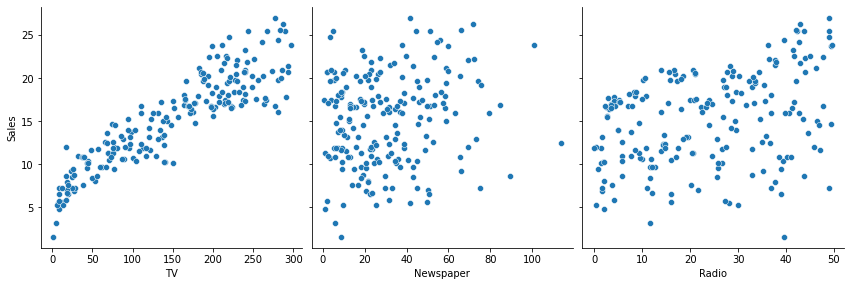

In [359]:
sbn.pairplot(SalesDS, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
SalesDS.pop('Radio')
SalesDS.pop('Newspaper')

X = SalesDS['TV']
Y = SalesDS["Sales"]
X = np.reshape(X.to_numpy(), (-1,1))
Y = np.reshape(Y.to_numpy(), (-1,1))

### Split Data into k-folds

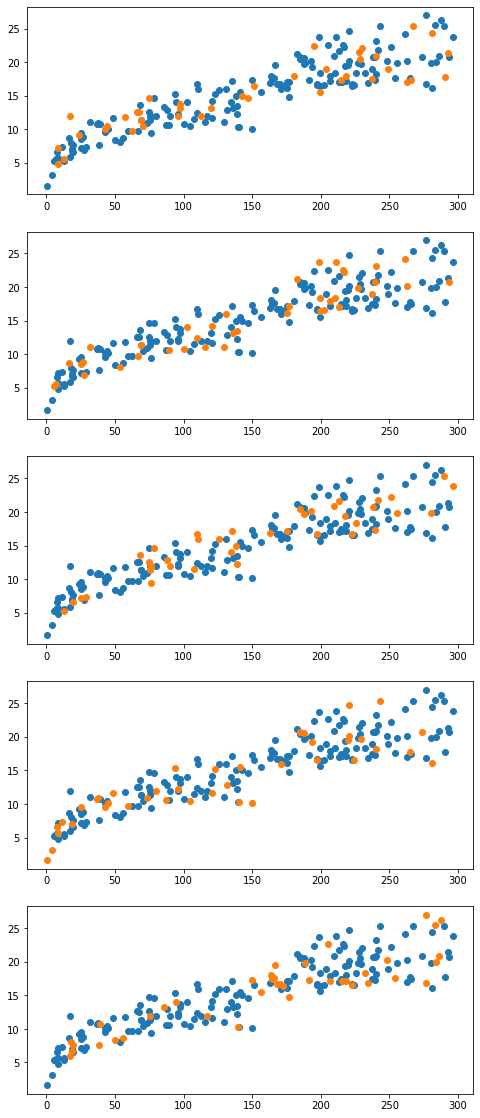

In [360]:
#Split data
k=5
kf = KFold(n_splits=k, random_state=None)

TrainDS = [set() for z in range(k)]
TestDS = [set() for z in range(k)]

i=0
for trainINDX, testINDX in kf.split(SalesDS):
  TrainDS[i] = SalesDS.iloc[trainINDX,:]
  TestDS[i] = SalesDS.iloc[testINDX,:]
  i = i+1


#show
fig, graph = plt.subplots(nrows = k, ncols=1)

fig.set_figwidth(8)
fig.set_figheight(20)

for i in range(k):  
  graph[i].scatter(TrainDS[i]["TV"], TrainDS[i]["Sales"])  
  graph[i].scatter(TestDS[i]["TV"], TestDS[i]["Sales"])  

### Cross Validate Score

MSE: 1.358352158730045


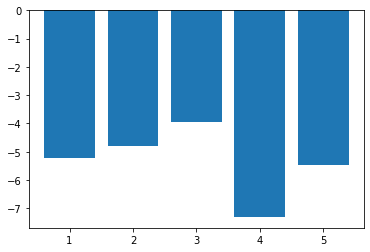

In [361]:
LRmodel = LinearRegression()
scores = cross_val_score(LRmodel, X, Y, scoring='neg_mean_squared_error', cv=kf)
plt.bar(('1','2', '3', '4', '5'), scores)
print("MSE:",np.sqrt(np.mean(np.absolute(scr))))

### Cross Validation Visualization

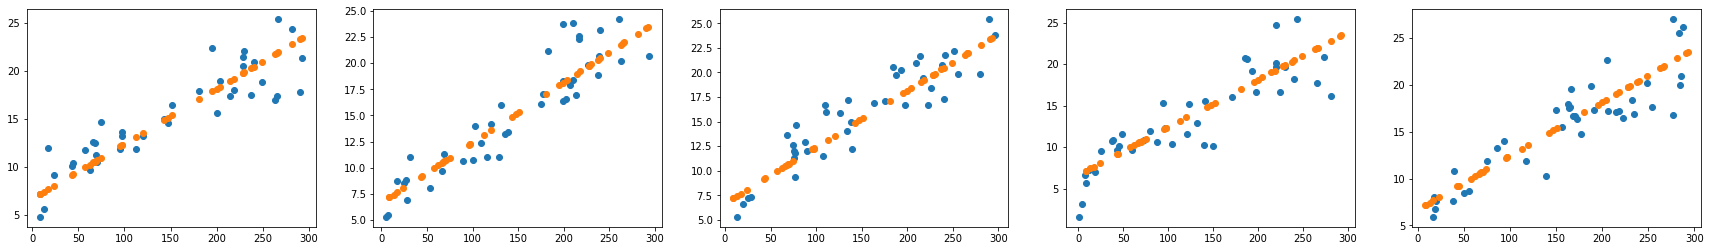

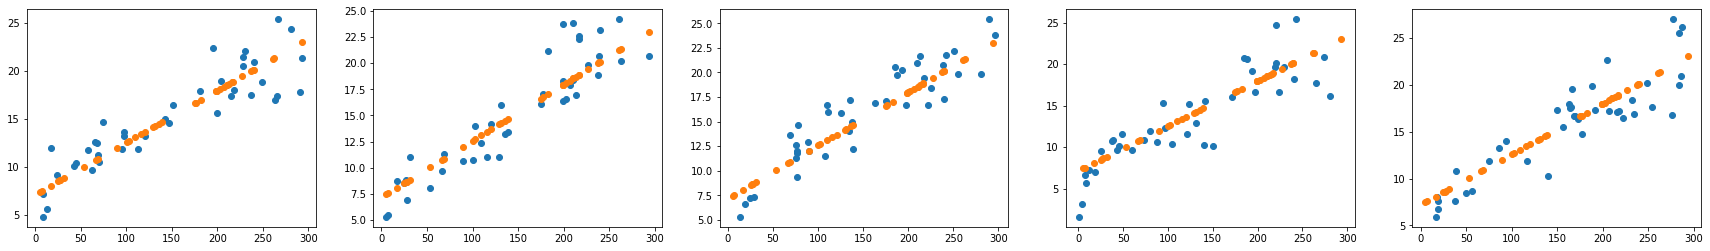

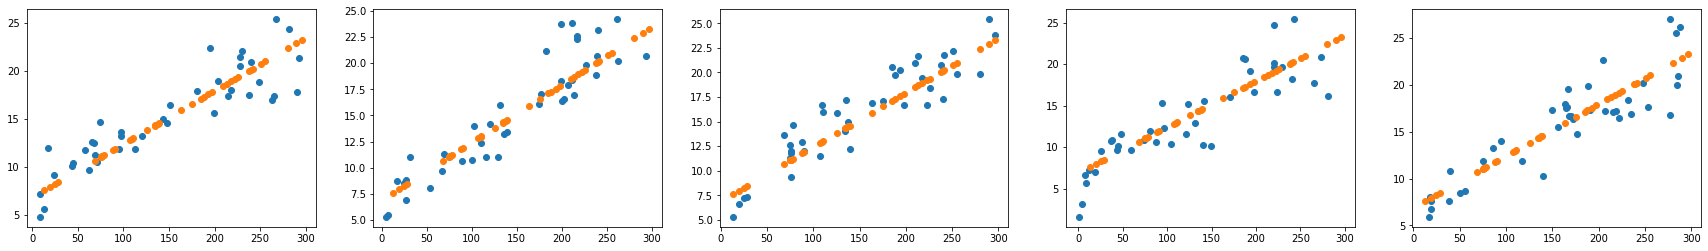

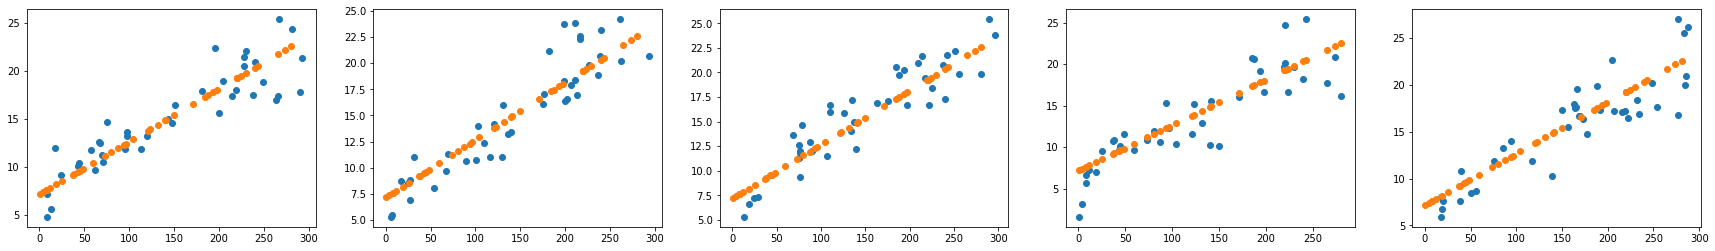

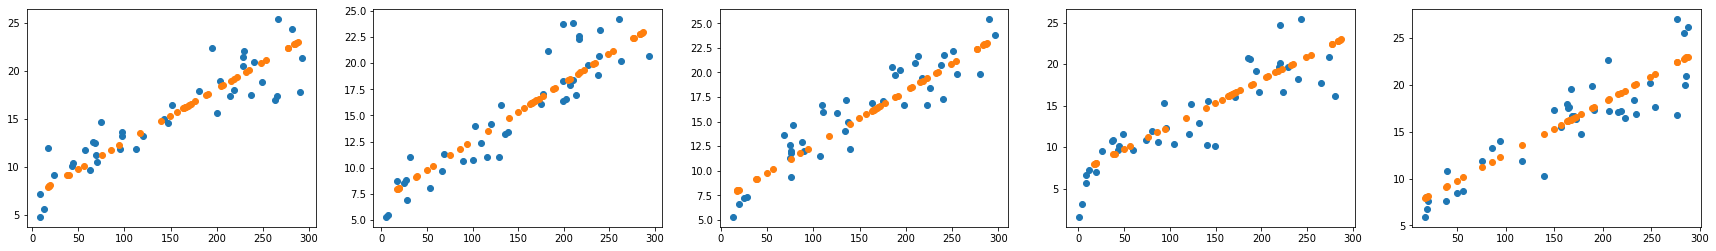

In [362]:
for i in range(k):
  X_Train = TrainDS[i]["TV"]
  Y_Train = TrainDS[i]["Sales"]
  X_Train = np.reshape(X_Train.to_numpy(), (-1,1))
  Y_Train = np.reshape(Y_Train.to_numpy(), (-1,1))

  X_Test = TestDS[i]["TV"]
  Y_Test = TestDS[i]["Sales"]
  X_Test = np.reshape(X_Test.to_numpy(), (-1,1))
  Y_Test = np.reshape(Y_Test.to_numpy(), (-1,1))

  #perform linear regression
  LRmodel.fit(X_Train, Y_Train)
  predict = LRmodel.predict(X_Test)

  fig, graph = plt.subplots(nrows = 1, ncols=k)
  fig.set_figwidth(30)
  fig.set_figheight(4)
  for i in range(k):  
    graph[i].scatter(TestDS[i]['TV'], TestDS[i]['Sales'])  
    graph[i].scatter(X_Test, predict)  